In [65]:
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [66]:
#Caminho para os arquivos utilizados
pasta = r'D:\PROJETOS\Eleicoes-2024'
arquivo_resultado_2024 = os.path.join(pasta, 'votacao_candidato_munzona_2024.zip')
arquivo_resultado_2020 = os.path.join(pasta, 'votacao_candidato_munzona_2020.zip')
arquivo_resultado_2016 = os.path.join(pasta, 'votacao_candidato_munzona_2016.zip')
arquivo_partidos_2024 = os.path.join(pasta,'partidos2024.csv')
arquivo_BR_municipios_shapefile = os.path.join(pasta, 'BR_Municipios_2022.zip/BR_Municipios_2022.shp')

In [67]:
#alterando formato de exibição dos gráficos do Pandas
pd.options.plotting.backend = 'plotly'

In [68]:
#variáveis globais
LOCAL = 'BRASIL' # Recebe a sigla da UF ou BRASIL
TIPO_CANDIDATO = 'Prefeito' #Recebe Vereador ou Prefeito

In [69]:
with ZipFile(arquivo_resultado_2024) as z:
    with z.open(f'votacao_candidato_munzona_2024_{LOCAL}.csv') as f:
        resultado_2024 = pd.read_csv(f, sep=';', encoding='ISO-8859-1', decimal=',')

In [70]:
with ZipFile(arquivo_resultado_2020) as z:
    with z.open(f'votacao_candidato_munzona_2020_{LOCAL}.csv') as f:
        resultado_2020 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [71]:
with ZipFile(arquivo_resultado_2016) as z:
    with z.open(f'votacao_candidato_munzona_2016_{LOCAL}.csv') as f:
        resultado_2016 = pd.read_csv(f,sep=';',encoding='ISO-8859-1', decimal=',')

In [72]:
resultado_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940022 entries, 0 to 940021
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   DT_GERACAO                940022 non-null  object
 1   HH_GERACAO                940022 non-null  object
 2   ANO_ELEICAO               940022 non-null  int64 
 3   CD_TIPO_ELEICAO           940022 non-null  int64 
 4   NM_TIPO_ELEICAO           940022 non-null  object
 5   NR_TURNO                  940022 non-null  int64 
 6   CD_ELEICAO                940022 non-null  int64 
 7   DS_ELEICAO                940022 non-null  object
 8   DT_ELEICAO                940022 non-null  object
 9   TP_ABRANGENCIA            940022 non-null  object
 10  SG_UF                     940022 non-null  object
 11  SG_UE                     940022 non-null  int64 
 12  NM_UE                     940022 non-null  object
 13  CD_MUNICIPIO              940022 non-null  int64 
 14  NM_M

In [73]:
partidos = pd.read_csv(arquivo_partidos_2024, sep=';')

In [74]:
partidos

,Espectro,SG_PARTIDO_TR,SG_PARTIDO,NR_PARTIDO
0,centro,AVANTE,AVANTE,70
1,direita,DC,DC,27
2,direita,DEM,DEM,25
3,centro,MDB,MDB,15
4,direita,NOVO,NOVO,30
5,direita,PATRIOTA,PATRIOTA,51
6,esquerda,PCB,PCB,21
7,esquerda,PCDOB,PC do B,65
8,esquerda,PCO,PCO,29
9,esquerda,PDT,PDT,12


In [75]:
espec_type = pd.CategoricalDtype(categories=['direita', 'centro', 'esquerda'], ordered=True)

In [76]:
partidos['Espectro'] = partidos['Espectro'].astype(espec_type)

In [77]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Espectro       34 non-null     category
 1   SG_PARTIDO_TR  34 non-null     object  
 2   SG_PARTIDO     34 non-null     object  
 3   NR_PARTIDO     34 non-null     int64   
dtypes: category(1), int64(1), object(2)
memory usage: 1.1+ KB


In [78]:
candidato_mais_votado_2024 = (
    resultado_2024[(resultado_2024['DS_CARGO'] == TIPO_CANDIDATO) & (resultado_2024['NR_TURNO'] == 1)]
    .groupby(['NR_CANDIDATO', 'NM_UE'])
    .agg({
        'NM_URNA_CANDIDATO': 'first',
        'NM_MUNICIPIO': 'first',
        'CD_MUNICIPIO': 'first',
        'DS_SIT_TOT_TURNO': 'first',
        'NR_PARTIDO': 'first',
        'SG_PARTIDO': 'first',
        'QT_VOTOS_NOMINAIS': 'sum'
    })
    .sort_values('QT_VOTOS_NOMINAIS', ascending=False)
    .reset_index()  # Redefine o índice para que NR_CANDIDATO seja uma coluna
    .drop_duplicates(subset='NR_CANDIDATO', keep='first')
)


In [79]:
candidato_mais_votado_2024

,NR_CANDIDATO,NM_UE,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS
0,55,RIO DE JANEIRO,EDUARDO PAES,RIO DE JANEIRO,60011,ELEITO,55,PSD,1861856
1,44,SALVADOR,BRUNO REIS,SALVADOR,38490,ELEITO,44,UNIÃO,1045690
2,22,RIO DE JANEIRO,ALEXANDRE RAMAGEM,RIO DE JANEIRO,60011,NÃO ELEITO,22,PL,948631
3,40,RECIFE,JOÃO CAMPOS,RECIFE,25313,ELEITO,40,PSB,725721
5,13,FORTALEZA,EVANDRO LEITÃO,FORTALEZA,13897,2º TURNO,13,PT,480174
10,15,BELÉM,DONA ALINE,BELÉM,19399,ELEITO,15,MDB,365995
11,10,CAMPINAS,DÁRIO SAADI,CAMPINAS,62910,ELEITO,10,REPUBLICANOS,355800
12,70,MANAUS,DAVID ALMEIDA,MANAUS,2550,2º TURNO,70,AVANTE,354596
16,11,NOVA IGUAÇU,DUDU REINA,NOVA IGUAÇU,58696,ELEITO,11,PP,292459
17,35,CURITIBA,CRISTINA GRAEML,CURITIBA,75353,2º TURNO,35,PMB,291523


In [80]:
candidato_mais_votado_20 = (
    resultado_2020[(resultado_2020['DS_CARGO'] == TIPO_CANDIDATO) & (resultado_2020['NR_TURNO'] == 1)]
    .groupby(['NR_CANDIDATO', 'NM_UE'])
    .agg({
        'NM_URNA_CANDIDATO': 'first',
        'NM_MUNICIPIO': 'first',
        'CD_MUNICIPIO': 'first',
        'DS_SIT_TOT_TURNO': 'first',
        'NR_PARTIDO': 'first',
        'SG_PARTIDO': 'first',
        'QT_VOTOS_NOMINAIS': 'sum'
    })
    .sort_values('QT_VOTOS_NOMINAIS', ascending=False)
    .reset_index()  # Redefine o índice para que NR_CANDIDATO seja uma coluna
    .drop_duplicates(subset='NR_CANDIDATO', keep='first')
)

In [81]:
candidato_mais_votado_20

,NR_CANDIDATO,NM_UE,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS
0,45,SÃO PAULO,BRUNO COVAS,SÃO PAULO,71072,2º TURNO,45,PSDB,1754013
1,50,SÃO PAULO,GUILHERME BOULOS,SÃO PAULO,71072,2º TURNO,50,PSOL,1080736
2,25,RIO DE JANEIRO,EDUARDO PAES,RIO DE JANEIRO,60011,2º TURNO,25,DEM,974804
3,55,BELO HORIZONTE,KALIL,BELO HORIZONTE,41238,ELEITO,55,PSD,784307
5,40,SÃO PAULO,MÁRCIO FRANÇA,SÃO PAULO,71072,NÃO ELEITO,40,PSB,728441
6,10,RIO DE JANEIRO,CRIVELLA,RIO DE JANEIRO,60011,2º TURNO,10,REPUBLICANOS,576825
8,51,SÃO PAULO,ARTHUR DO VAL MAMÃE FALEI,SÃO PAULO,71072,NÃO ELEITO,51,PATRIOTA,522210
10,13,SÃO PAULO,JILMAR TATTO,SÃO PAULO,71072,NÃO ELEITO,13,PT,461666
11,12,FORTALEZA,SARTO,FORTALEZA,13897,2º TURNO,12,PDT,457622
12,90,FORTALEZA,CAPITÃO WAGNER,FORTALEZA,13897,2º TURNO,90,PROS,426803


In [82]:
candidato_mais_votado_2016 = (
    resultado_2016[(resultado_2016['DS_CARGO'] == TIPO_CANDIDATO) & (resultado_2016['NR_TURNO'] == 1)]
    .groupby(['NR_CANDIDATO', 'NM_UE'])
    .agg({
        'NM_URNA_CANDIDATO': 'first',
        'NM_MUNICIPIO': 'first',
        'CD_MUNICIPIO': 'first',
        'DS_SIT_TOT_TURNO': 'first',
        'NR_PARTIDO': 'first',
        'SG_PARTIDO': 'first',
        'QT_VOTOS_NOMINAIS': 'sum'
    })
    .sort_values('QT_VOTOS_NOMINAIS', ascending=False)
    .reset_index()  # Redefine o índice para que NR_CANDIDATO seja uma coluna
    .drop_duplicates(subset='NR_CANDIDATO', keep='first')
)

In [83]:
candidato_mais_votado_2016

,NR_CANDIDATO,NM_UE,NM_URNA_CANDIDATO,NM_MUNICIPIO,CD_MUNICIPIO,DS_SIT_TOT_TURNO,NR_PARTIDO,SG_PARTIDO,QT_VOTOS_NOMINAIS
0,45,SÃO PAULO,JOÃO DORIA,SÃO PAULO,71072,ELEITO,45,PSDB,3085187
1,25,SALVADOR,ACM NETO,SALVADOR,38490,ELEITO,25,DEM,982246
2,13,SÃO PAULO,FERNANDO HADDAD,SÃO PAULO,71072,NÃO ELEITO,13,PT,967190
3,10,RIO DE JANEIRO,CRIVELLA,RIO DE JANEIRO,60011,2º TURNO,10,PRB,842201
5,15,SÃO PAULO,MARTA,SÃO PAULO,71072,NÃO ELEITO,15,PMDB,587220
6,50,RIO DE JANEIRO,MARCELO FREIXO,RIO DE JANEIRO,60011,2º TURNO,50,PSOL,553424
7,12,FORTALEZA,ROBERTO CLAUDIO,FORTALEZA,13897,2º TURNO,12,PDT,524973
9,40,RECIFE,GERALDO JULIO,RECIFE,25313,2º TURNO,40,PSB,430997
10,20,RIO DE JANEIRO,FLÁVIO BOLSONARO,RIO DE JANEIRO,60011,NÃO ELEITO,20,PSC,424307
11,22,FORTALEZA,CAPITÃO WAGNER,FORTALEZA,13897,2º TURNO,22,PR,400802


In [84]:
geo_df = gpd.read_file("D:/PROJETOS/Eleicoes-2024/BR_Municipios_2022.shp")

In [85]:
if LOCAL != 'BRASIL':
    geo_df = geo_df[geo_df.SIGLA_UF == LOCAL]

geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()

In [86]:
geo_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,ALTA FLORESTA D'OESTE,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,ARIQUEMES,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,CABIXI,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,CACOAL,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,CEREJEIRAS,RO,2783.300,"POLYGON ((-60.82135 -13.1191, -60.81773 -13.12..."
...,...,...,...,...,...
5567,5222005,VIANÓPOLIS,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.3117 -16.84..."
5568,5222054,VICENTINÓPOLIS,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,VILA BOA,GO,1052.593,"POLYGON ((-47.0778 -15.06364, -47.07799 -15.06..."
5570,5222302,VILA PROPÍCIO,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


In [87]:
resultado_2024 = resultado_2024.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [88]:
resultado_2020 = resultado_2020.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [89]:
resultado_2016 = resultado_2016.\
merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO')

In [90]:
votos_espectro_2024 = resultado_2024[(resultado_2024['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2024['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_mais_votado_2024 = votos_espectro_2024.loc[votos_espectro_2024.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_mais_votado_2024

C:\Users\luizg\AppData\Local\Temp\ipykernel_5972\2000682553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_espectro_2024 = resultado_2024[(resultado_2024['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2024['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()


,CD_MUNICIPIO,Espectro,NM_MUNICIPIO,SG_UF,QT_VOTOS_NOMINAIS_VALIDOS
0,19,direita,GUAJARÁ-MIRIM,RO,14609
1,35,direita,PORTO VELHO,RO,179843
2,51,direita,JI-PARANÁ,RO,67486
3,78,direita,ARIQUEMES,RO,47550
4,94,direita,CACOAL,RO,46495
...,...,...,...,...,...
5549,98990,direita,VILA RICA,MT,9758
5550,99015,direita,COMODORO,MT,8647
5551,99031,direita,FIGUEIRÓPOLIS D OESTE,MT,1312
5552,99058,direita,GUARANTÃ DO NORTE,MT,9166


In [91]:
votos_espectro_2020 = resultado_2020[(resultado_2020['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2020['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()
espectro_mais_votado_2020 = votos_espectro_2020.loc[votos_espectro_2020.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS_VALIDOS'].idxmax()].reset_index(drop=True)
espectro_mais_votado_2020

C:\Users\luizg\AppData\Local\Temp\ipykernel_5972\421190654.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  votos_espectro_2020 = resultado_2020[(resultado_2020['DS_CARGO']== TIPO_CANDIDATO)&(resultado_2020['NR_TURNO']==1)].groupby(['CD_MUNICIPIO','Espectro']).agg({'NM_MUNICIPIO':'first','SG_UF':'first','QT_VOTOS_NOMINAIS_VALIDOS':'sum'}).reset_index()


,CD_MUNICIPIO,Espectro,NM_MUNICIPIO,SG_UF,QT_VOTOS_NOMINAIS_VALIDOS
0,19,direita,GUAJARÁ-MIRIM,RO,9187
1,35,centro,PORTO VELHO,RO,124943
2,51,direita,JI-PARANÁ,RO,25004
3,78,direita,ARIQUEMES,RO,25759
4,94,direita,CACOAL,RO,39031
...,...,...,...,...,...
5562,98990,direita,VILA RICA,MT,5552
5563,99015,direita,COMODORO,MT,6843
5564,99031,direita,FIGUEIRÓPOLIS D OESTE,MT,2471
5565,99058,direita,GUARANTÃ DO NORTE,MT,9695


In [92]:
espectro_mais_votado_2024_geo_df = geo_df.merge(espectro_mais_votado_2024, left_on='NM_MUN', right_on='NM_MUNICIPIO')
espectro_mais_votado_2020_geo_df = geo_df.merge(espectro_mais_votado_2020, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Mais Votado BRASIL 2024 (Prefeito)'}>

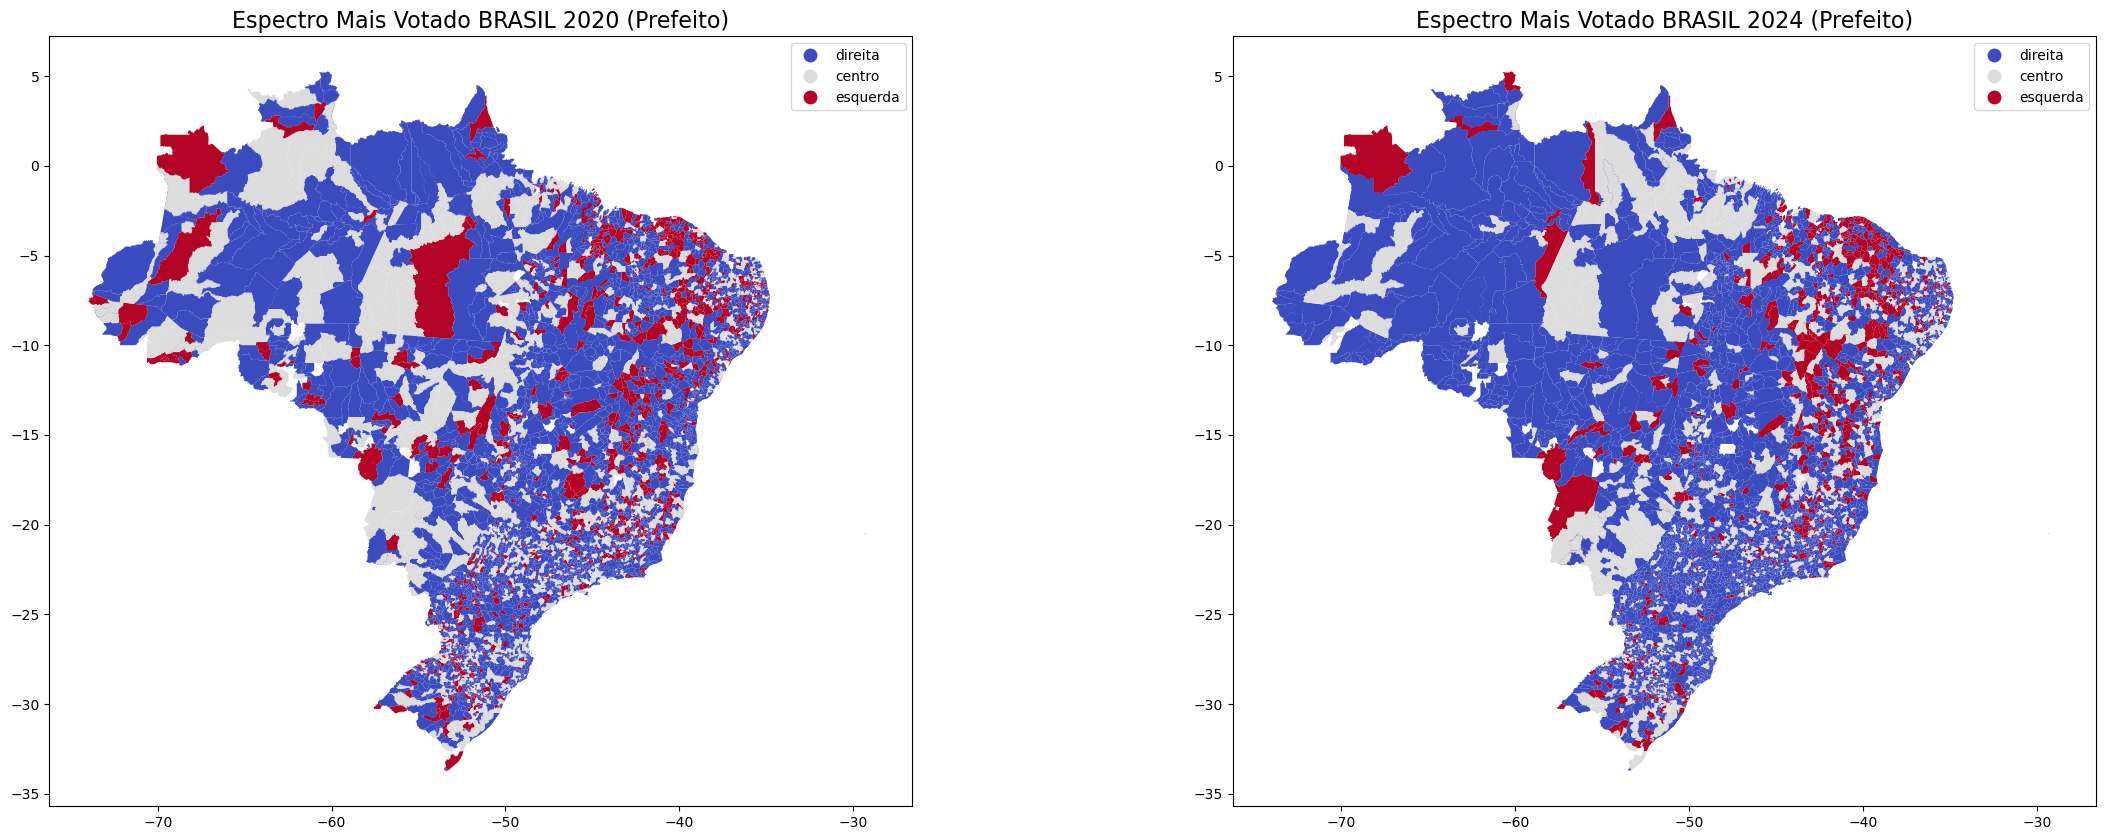

In [93]:
fig, ax = plt.subplots(1,2,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votado {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[1].set_title(f'Espectro Mais Votado {LOCAL} 2024 ({TIPO_CANDIDATO})', color='black', size=16)

espectro_mais_votado_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
espectro_mais_votado_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])

In [94]:
candidatos_mais_votados_2016 = resultado_2016[(resultado_2016['DS_CARGO']==TIPO_CANDIDATO)&(resultado_2016['NR_TURNO']== 1)]\
.groupby(['NR_CANDIDATO','NM_UE'])\
.agg({'Espectro' :'first','NM_URNA_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first', 'CD_MUNICIPIO' :'first',
    'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
    'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
    .drop_duplicates(subset=['CD_MUNICIPIO'],keep='first')

In [98]:
candidatos_mais_votados_2016

Espectro   NM_URNA_CANDIDATO    NM_MUNICIPIO  \
NR_CANDIDATO NM_UE                                                          
45           SÃO PAULO         centro          JOÃO DORIA       SÃO PAULO   
25           SALVADOR         direita            ACM NETO        SALVADOR   
10           RIO DE JANEIRO   direita            CRIVELLA  RIO DE JANEIRO   
12           FORTALEZA       esquerda     ROBERTO CLAUDIO       FORTALEZA   
40           RECIFE          esquerda       GERALDO JULIO          RECIFE   
...                               ...                 ...             ...   
             NOVA VENEZA     esquerda              MATTIA     NOVA VENEZA   
10           BOM JARDIM       direita   MARCILIO DA ULFER      BOM JARDIM   
12           CANÁPOLIS       esquerda            DR. EDER       CANÁPOLIS   
45           JANDAÍRA          centro    REGINALDO DANTAS        JANDAÍRA   
23           ALVORADA        esquerda  WOLNEY DA FARMACIA        ALVORADA   

                             CD_MUNICIPIO DS_SIT_TOT_TURNO  NR_PARTIDO  \
NR_CANDIDATO NM_UE                                                       
45           SÃO PAULO              71072           ELEITO          45   
25           SALVADOR               38490           ELEITO          25   
10           RIO DE JANEIRO         60011         2º TURNO          10   
12           FORTALEZA              13897         2º TURNO          12   
40           RECIFE                 25313         2º TURNO          40   
...                                   ...              ...         ...   
             NOVA VENEZA            82279       NÃO ELEITO          40   
10           BOM JARDIM             58092       NÃO ELEITO          10   
12           CANÁPOLIS              42358       NÃO ELEITO          12   
45           JANDAÍRA               16993       NÃO ELEITO          45   
23           ALVORADA               92134       NÃO ELEITO          23   

                            SG_PARTIDO  QT_VOTOS_NOMINAIS  
NR_CANDIDATO NM_UE                                         
45           SÃO PAULO            PSDB            3085187  
25           SALVADOR              DEM             982246  
10           RIO DE JANEIRO        PRB             842201  
12           FORTALEZA             PDT             524973  
40           RECIFE                PSB             430997  
...                                ...                ...  
             NOVA VENEZA           PSB                388  
10           BOM JARDIM            PRB                375  
12           CANÁPOLIS             PDT                199  
45           JANDAÍRA             PSDB                115  
23           ALVORADA              PPS                 16  

[5557 rows x 8 columns]

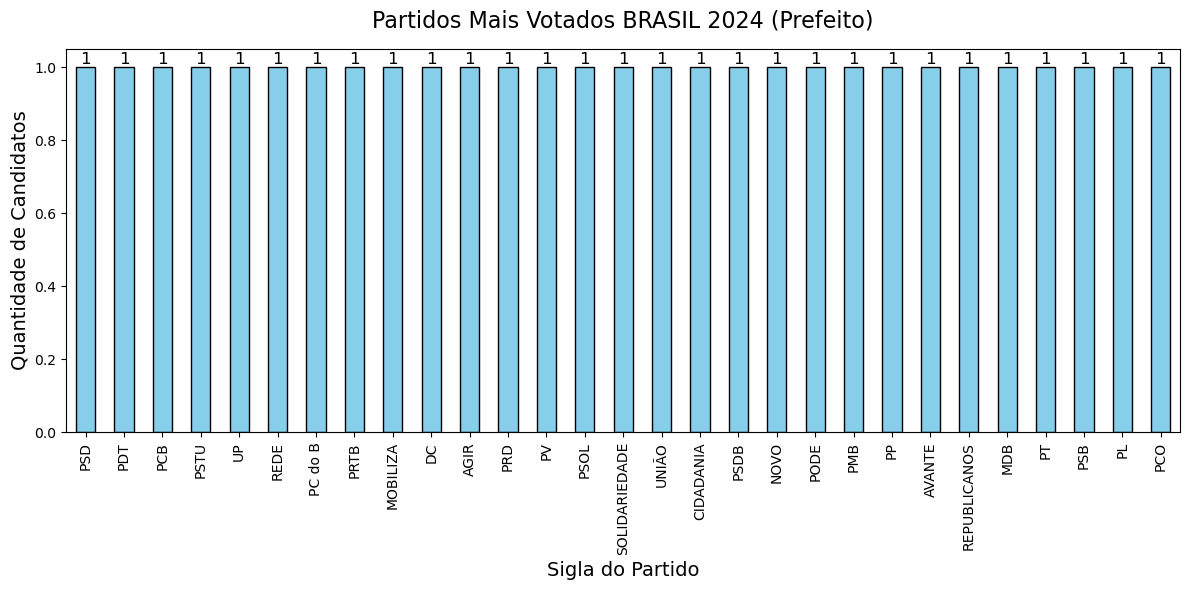

In [101]:
# Forçar o backend do matplotlib
pd.options.plotting.backend = "matplotlib"

# Código do gráfico
plt.figure(figsize=(12, 6))
ax = candidato_mais_votado_2024['SG_PARTIDO'].value_counts().plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black'
)

ax.set_title(f'Partidos Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})', fontsize=16, pad=15, loc='center')
ax.set_xlabel('Sigla do Partido', fontsize=14)
ax.set_ylabel('Quantidade de Candidatos', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

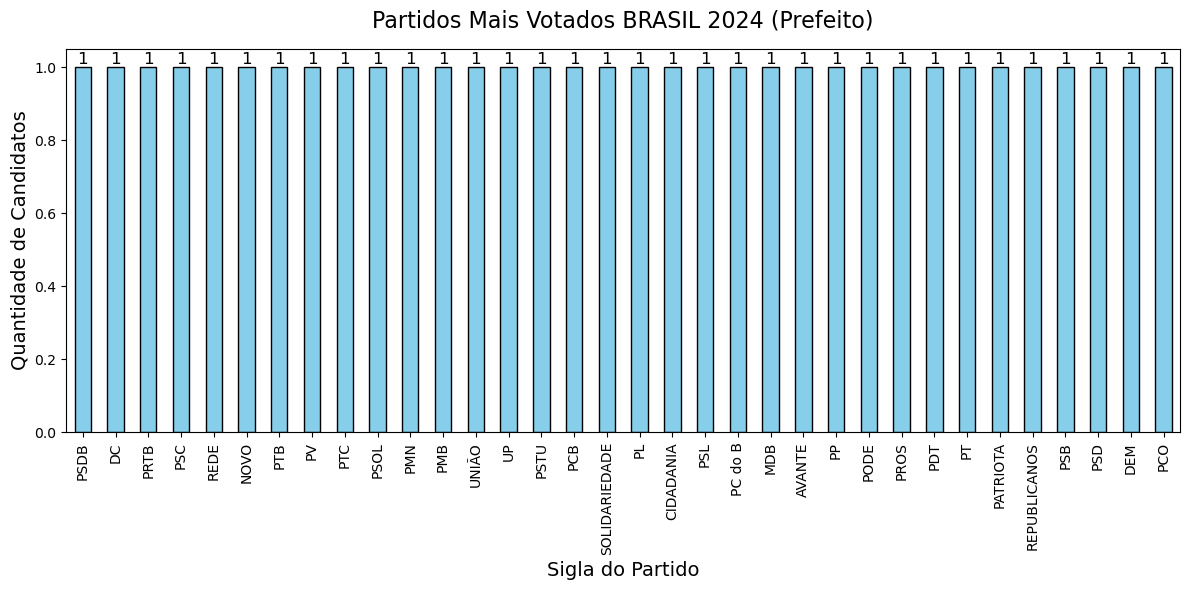

In [102]:
# Forçar o backend do matplotlib
pd.options.plotting.backend = "matplotlib"

# Código do gráfico
plt.figure(figsize=(12, 6))
ax = candidato_mais_votado_20['SG_PARTIDO'].value_counts().plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black'
)

ax.set_title(f'Partidos Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})', fontsize=16, pad=15, loc='center')
ax.set_xlabel('Sigla do Partido', fontsize=14)
ax.set_ylabel('Quantidade de Candidatos', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

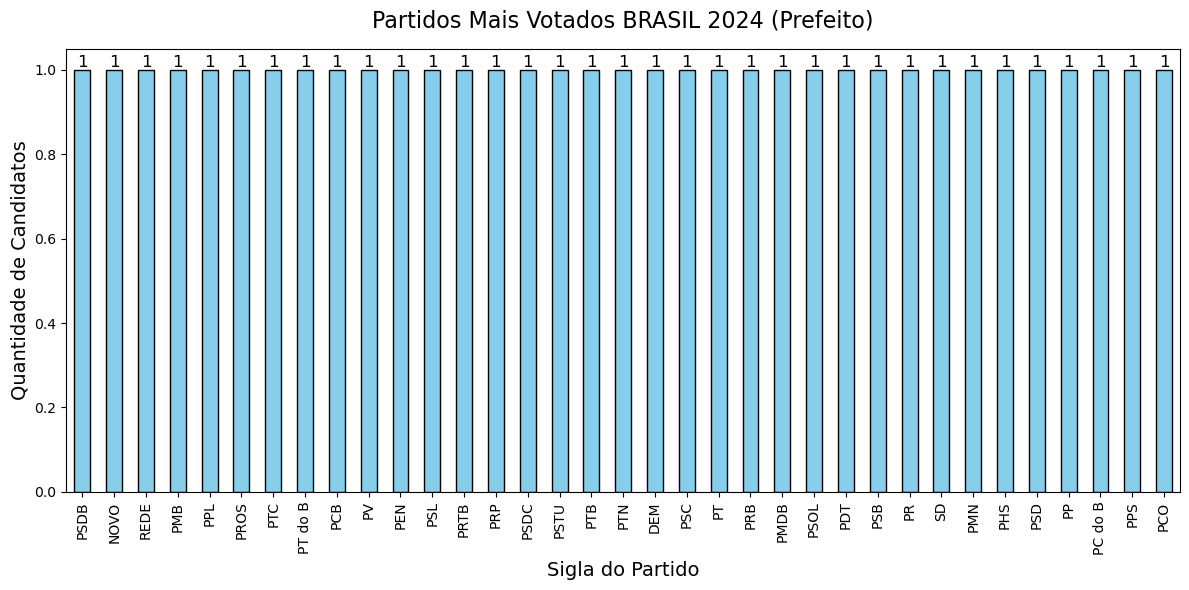

In [103]:
# Forçar o backend do matplotlib
pd.options.plotting.backend = "matplotlib"

# Código do gráfico
plt.figure(figsize=(12, 6))
ax = candidato_mais_votado_2016['SG_PARTIDO'].value_counts().plot(
    kind='bar', 
    color='skyblue', 
    edgecolor='black'
)

ax.set_title(f'Partidos Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})', fontsize=16, pad=15, loc='center')
ax.set_xlabel('Sigla do Partido', fontsize=14)
ax.set_ylabel('Quantidade de Candidatos', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [104]:
candidatos_mais_votados_2024_geo_df = geo_df.merge(candidato_mais_votado_2024, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2020_geo_df = geo_df.merge(candidato_mais_votado_20, left_on='NM_MUN', right_on='NM_MUNICIPIO')
candidatos_mais_votados_2016_geo_df = geo_df.merge(candidatos_mais_votados_2016, left_on='NM_MUN', right_on='NM_MUNICIPIO')

<Axes: title={'center': 'Espectro Mais Votados BRASIL 2024 (Prefeito)'}>

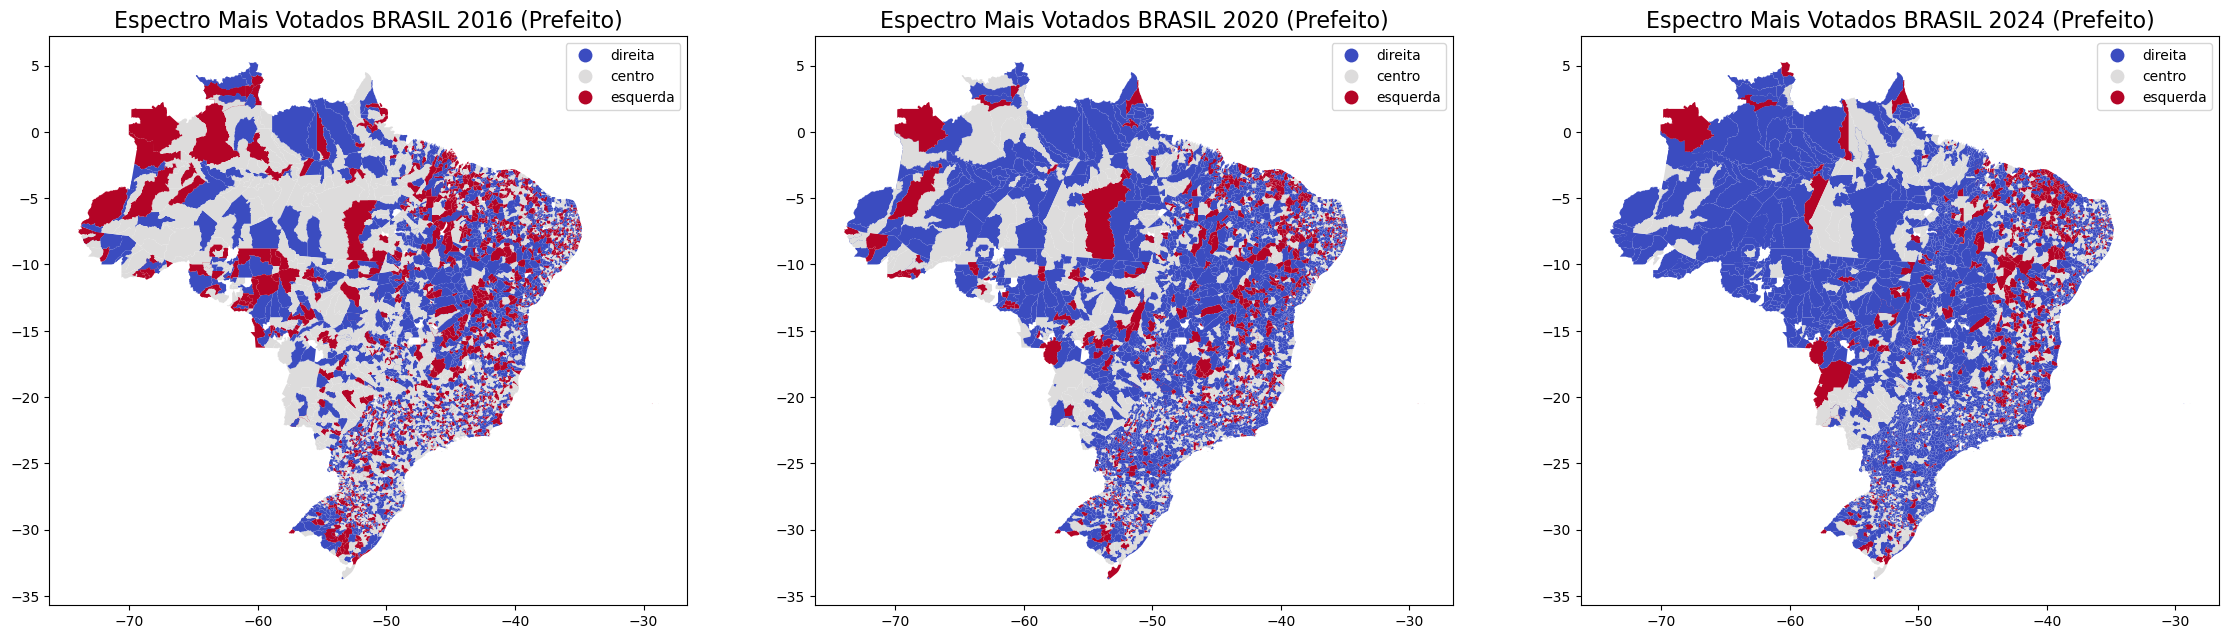

In [108]:
fig, ax = plt.subplots(1,3,figsize=(28,10))
ax[0].set_title(f'Espectro Mais Votados {LOCAL} 2016 ({TIPO_CANDIDATO})', color='black', size=16)
ax[1].set_title(f'Espectro Mais Votados {LOCAL} 2020 ({TIPO_CANDIDATO})', color='black', size=16)
ax[2].set_title(f'Espectro Mais Votados {LOCAL} 2024 ({TIPO_CANDIDATO})', color='black', size=16)

candidatos_mais_votados_2016_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[0])
espectro_mais_votado_2020_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[1])
espectro_mais_votado_2024_geo_df.plot(column='Espectro', legend=True, cmap='coolwarm', ax=ax[2])

## Analisando distribuição dos Vereadores Eleitos

In [109]:
vereadores_eleitos_2024 = resultado_2024[(resultado_2024['DS_CARGO']=='Vereador')&(resultado_2024['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first',
                        'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                        'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [110]:
vereadores_eleitos_2020 = resultado_2020[(resultado_2020['DS_CARGO']=='Vereador')&(resultado_2020['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first',
                        'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                        'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

In [111]:
vereadores_eleitos_2016 = resultado_2016[(resultado_2016['DS_CARGO']=='Vereador')&
                                        (resultado_2016['DS_SIT_TOT_TURNO'].str.contains('ELEITO POR'))]\
                    .groupby(['NR_CANDIDATO','NM_UE'])\
                    .agg({'NM_CANDIDATO' :'first', 'NM_MUNICIPIO' :'first',
                        'DS_SIT_TOT_TURNO' :'first', 'NR_PARTIDO' :'first',
                        'SG_PARTIDO' :'first','QT_VOTOS_NOMINAIS' : 'sum' })\
                    .sort_values(by='QT_VOTOS_NOMINAIS',ascending=False)\
                .merge(partidos[['NR_PARTIDO','Espectro']], left_on='NR_PARTIDO', right_on='NR_PARTIDO').reset_index(drop=True)

<Axes: title={'center': 'Espectro Vereadores Eleitos 2016'}, xlabel='Espectro'>

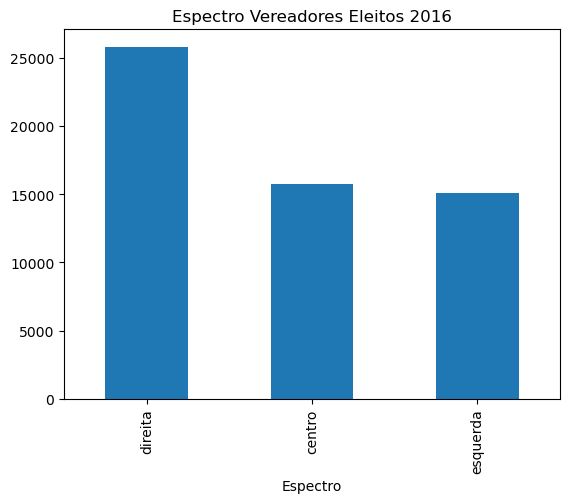

In [112]:
vereadores_eleitos_2016.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2016')

<Axes: title={'center': 'Espectro Vereadores Eleitos 2020'}, xlabel='Espectro'>

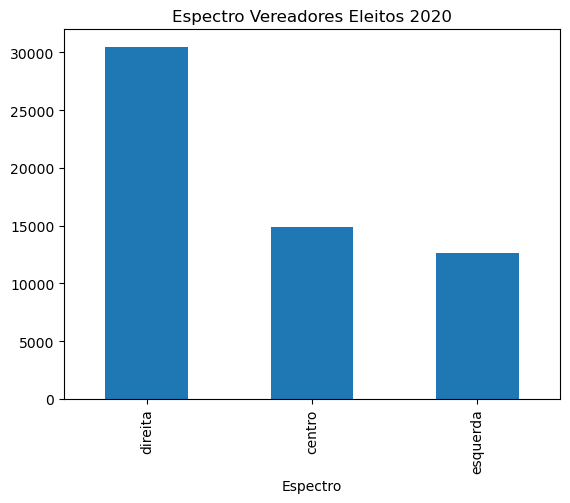

In [113]:
vereadores_eleitos_2020.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2020')

<Axes: title={'center': 'Espectro Vereadores Eleitos 2024'}, xlabel='Espectro'>

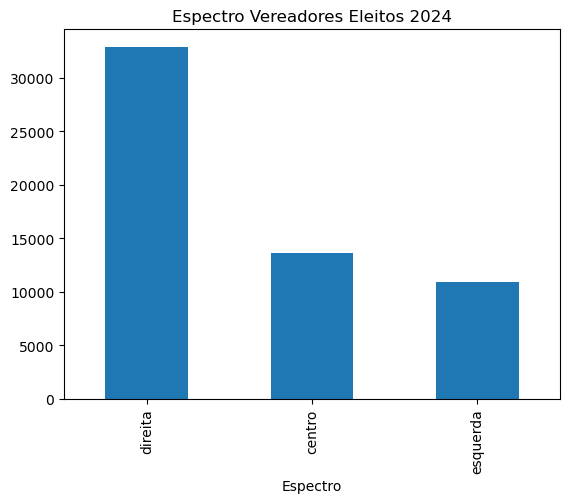

In [114]:
vereadores_eleitos_2024.Espectro.value_counts().plot(kind='bar',title='Espectro Vereadores Eleitos 2024')